In [1]:
TEST_RATIO = 1

In [2]:
SAMPLE_INTERVAL = 60 * 15
HISTORY_FILENAME = 'transaction-history.txt'

In [3]:
SAMPLE_INTERVAL = 60
HISTORY_FILENAME = 'sample-history.txt'

In [4]:
SAMPLE_INTERVAL = 1
HISTORY_FILENAME = 'sample-history.txt'

In [5]:
import matplotlib.pyplot as plt
plt.close('all')

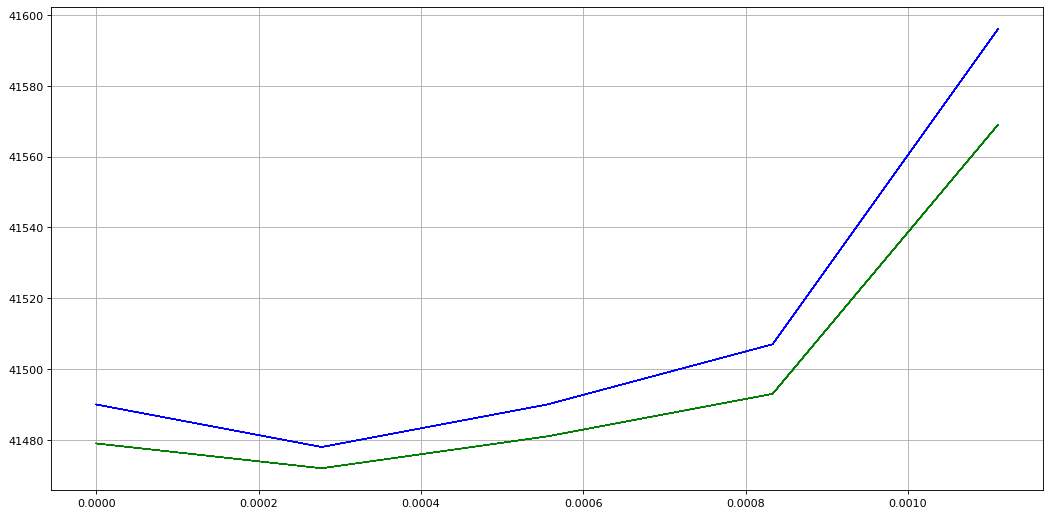

In [ ]:
import matplotlib.pyplot as plt
plt.close('all')

plt.figure(figsize=(16, 8), dpi=80)
plt.grid(True)

import IPython
import re
import time

num = []
buy = []
sell = []
with open(HISTORY_FILENAME, 'r') as f:
    i = 0
    while True:
        for line in f.readlines():
            res = re.search(
                r'^(?:(?:BOUGHT)|(?:BUY))(?: \d+\.?\d*)?(?: ETH)? for (\d+) JPY'
                r'(?:: SELL)?(?: ETH)?(?: for )?(\d+)?(?: JPY)?(?:: NO\.\d+)?',
                line
            )
            if res is None:
                continue
            num.append(SAMPLE_INTERVAL/TEST_RATIO/3600 * i)
            buy.append(int(res.group(1)))
            sell.append(None if res.group(2) is None else int(res.group(2)))
            i += 1

        plt.plot(num, buy, 'b-', linewidth=0.8)
        plt.plot(num, sell, 'g-', linewidth=0.8)

        IPython.display.display(plt.gcf())
        IPython.display.clear_output(wait=True)

        time.sleep(SAMPLE_INTERVAL/TEST_RATIO/10)